In [1]:
import sys
sys.path.append('/scratch/nf33/sc5932/hk25-AusNode-TConvZones/functions')

from SC_function import get_nn_lon_lat_index

import xarray as xr

import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs


In [2]:
mean_era5_loaded = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded/mean_era5.nc').tp
mean_uk_aligned = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded//mean_uk_aligned.nc').pr
mean_germany_aligned = xr.open_dataset('/scratch/nf33/sc5932//Data/regridded/mean_germany_aligned.nc').pr
mean_imerg = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded/mean_imerg_aligned.nc').precipitation
mean_access = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded/mean_access_amip_aligned.nc').pr

diff_germany = mean_germany_aligned - mean_era5_loaded
diff_uk = mean_uk_aligned - mean_era5_loaded
diff_imerg = mean_imerg - mean_era5_loaded
diff_access =mean_access- mean_era5_loaded


/scratch/wq02/sc5932/tmp/ipykernel_3830775/3351778471.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


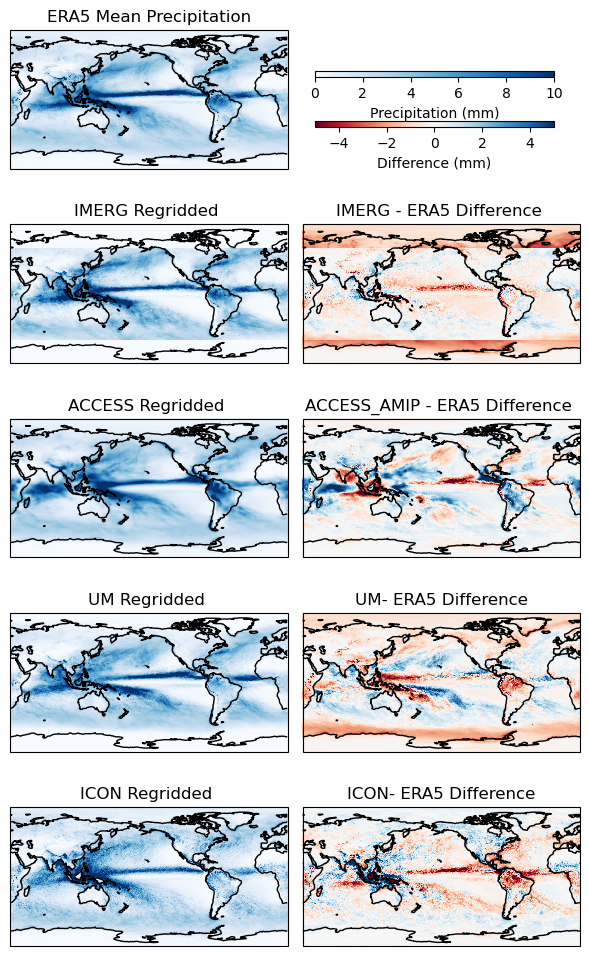

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

mon_name = 'annual mean'
mean_all = [
    mean_era5_loaded,
    mean_imerg ,
    mean_access,
    mean_uk_aligned,
    mean_germany_aligned,
]
diff_all = [diff_imerg , diff_access,  diff_uk,diff_germany]

# Define projection
projection = ccrs.PlateCarree(central_longitude=205)

# Create 2 rows x 3 columns of subplots
fig, axes = plt.subplots(5, 2, figsize=(6, 10), subplot_kw={'projection': projection})


# Main color scale (for mean values)
vmin_main, vmax_main = 0, 10

# Difference color scale
vmin_diff, vmax_diff = -5, 5

# 1. Plot ERA5 Mean
m0 = mean_all[0].plot(
    ax=axes[0,0],
    cmap='Blues',
    vmin=vmin_main,
    vmax=vmax_main,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)
axes[0,0].coastlines()
axes[0,0].set_title('ERA5 Mean Precipitation' )

# 2. UK Regridded
mean_all[1].plot(
    ax=axes[1,0],
    cmap='Blues',
    vmin=vmin_main,
    vmax=vmax_main,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)
axes[1,0].coastlines()
axes[1,0].set_title('IMERG Regridded ')

mean_all[2].plot(
    ax=axes[2,0],
    cmap='Blues',
    vmin=vmin_main,
    vmax=vmax_main,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)
axes[2,0].coastlines()
axes[2,0].set_title('ACCESS Regridded ')

mean_all[3].plot(
    ax=axes[3,0],
    cmap='Blues',
    vmin=vmin_main,
    vmax=vmax_main,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)
axes[3,0].coastlines()
axes[3,0].set_title('UM Regridded ')

mean_all[4].plot(
    ax=axes[4,0],
    cmap='Blues',
    vmin=vmin_main,
    vmax=vmax_main,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)
axes[4,0].coastlines()
axes[4,0].set_title('ICON Regridded ')


# 4. UK - ERA5
m1 = diff_all[0].plot(
    ax=axes[1,1],
    cmap='RdBu',
    vmin=vmin_diff,
    vmax=vmax_diff,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)
axes[1,1].coastlines()
axes[1,1].set_title('IMERG - ERA5 Difference ' )

# 5. Germany - ERA5
diff_all[1].plot(
    ax=axes[2,1],
    cmap='RdBu',
    vmin=vmin_diff,
    vmax=vmax_diff,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)

axes[2,1].coastlines()
axes[2,1].set_title('ACCESS_AMIP - ERA5 Difference ' )

diff_all[2].plot(
    ax=axes[3,1],
    cmap='RdBu',
    vmin=vmin_diff,
    vmax=vmax_diff,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)

axes[3,1].coastlines()
axes[3,1].set_title('UM- ERA5 Difference')

diff_all[3].plot(
    ax=axes[4,1],
    cmap='RdBu',
    vmin=vmin_diff,
    vmax=vmax_diff,
    transform=ccrs.PlateCarree(),
    add_colorbar=False
)

axes[4,1].coastlines()
axes[4,1].set_title('ICON- ERA5 Difference')

# Use axes[5] for the colorbars
axes[0,1].axis('off')

# Get position of axes[5]
pos = axes[0,1].get_position()

# Define inset axes for mean and diff colorbars inside axes[5]
mean_cax = fig.add_axes([pos.x0 - 0.07, pos.y0 + 0.16, 1.8 * pos.width, 0.05 * pos.height])
diff_cax = fig.add_axes([pos.x0 - 0.07, pos.y0 + 0.11, 1.8 * pos.width, 0.05 * pos.height])

# Mean colorbar
cbar_mean = fig.colorbar(m0, cax=mean_cax, orientation='horizontal')
cbar_mean.set_label('Precipitation (mm)', fontsize=10)

# Difference colorbar
cbar_diff = fig.colorbar(m1, cax=diff_cax, orientation='horizontal')
cbar_diff.set_label('Difference (mm)', fontsize=10)
plt.tight_layout()
name_save = "/scratch/nf33/sc5932/Fig/Diff_prcp_" + mon_name
# plt.savefig(name_save , dpi=300, bbox_inches='tight')
